In [2]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# data set path

path = r"/Users/martin/anaconda_projects/11-02-2025 Instacart Basket Analysis"

In [4]:
# import amsterdam_listings.csv

df = pd.read_csv(os.path.join(path, '02 data' , 'Original Data' , 'amsterdam_listings.csv'))

# Task 5) Data Cleaning

## 1. Shape & Overview

In [7]:
df.shape       # Rows and columns

(10075, 79)

In [8]:
df.columns     # Column names

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [9]:
df.info()      # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10075 non-null  int64  
 1   listing_url                                   10075 non-null  object 
 2   scrape_id                                     10075 non-null  int64  
 3   last_scraped                                  10075 non-null  object 
 4   source                                        10075 non-null  object 
 5   name                                          10075 non-null  object 
 6   description                                   9729 non-null   object 
 7   neighborhood_overview                         5332 non-null   object 
 8   picture_url                                   10075 non-null  object 
 9   host_id                                       10075 non-null 

In [10]:
df.head()      # First rows

id                         listing_url       scrape_id last_scraped  \
0   2818   https://www.airbnb.com/rooms/2818  20250302144653   2025-03-03   
1  27886  https://www.airbnb.com/rooms/27886  20250302144653   2025-03-03   
2  28871  https://www.airbnb.com/rooms/28871  20250302144653   2025-03-03   
3  29051  https://www.airbnb.com/rooms/29051  20250302144653   2025-03-03   
4  44391  https://www.airbnb.com/rooms/44391  20250302144653   2025-03-03   

            source                                               name  \
0      city scrape          Quiet Garden View Room & Super Fast Wi-Fi   
1  previous scrape  Romantic, stylish B&B houseboat in canal district   
2      city scrape                            Comfortable double room   
3      city scrape                            Comfortable single room   
4  previous scrape    Quiet 2-bedroom Amsterdam city centre apartment   

                                         description  \
0          Quiet Garden View Room & Super Fast Wi-Fi   
1  Stylish and romantic houseboat on fantastic hi...   
2          Basic bedroom in the center of Amsterdam.   
3  This room can also be rented as a single or a ...   
4  Guests greatly appreciate the unique location ...   

                               neighborhood_overview  \
0  Indische Buurt ("Indies Neighborhood") is a ne...   
1         Central, quiet, safe, clean and beautiful.   
2       Flower market , Leidseplein , Rembrantsplein   
3  the street is quite lively especially on weeke...   
4  The appartment is located in the city centre. ...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/10272854/8dcc...     3159  ...   
1  https://a0.muscache.com/pictures/02c2da9d-660e...    97647  ...   
2  https://a0.muscache.com/pictures/160889/362340...   124245  ...   
3  https://a0.muscache.com/pictures/162009/bd6be2...   124245  ...   
4  https://a0.muscache.com/pictures/97741545/3900...   194779  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.98                   4.73                4.80   
1                        4.92                   4.89                4.77   
2                        4.94                   4.94                4.83   
3                        4.92                   4.87                4.79   
4                        4.90                   4.68                4.50   

                    license instant_bookable calculated_host_listings_count  \
0  0363 5F3A 5684 6750 D14D                f                              1   
1  0363 974D 4986 7411 88D8                f                              1   
2  0363 607B EA74 0BD8 2F6F                f                              2   
3  0363 607B EA74 0BD8 2F6F                f                              2   
4  0363 E76E F06A C1DD 172C                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            1   
2                                            2   
3                                            2   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              2.05  
1                                           0              1.84  
2                                           0              3.83  
3                                           0              4.67  
4                                           0              0.24  

[5 rows x 79 columns]

## 2. Find Missing Values

In [12]:
df.isnull().sum().sort_values(ascending=False)

calendar_updated                10075
neighbourhood_group_cleansed    10075
host_neighbourhood               7207
host_about                       4760
neighbourhood                    4743
                                ...  
maximum_nights                      0
availability_30                     0
availability_60                     0
availability_90                     0
amenities                           0
Length: 79, dtype: int64

### Several columns contain missing values. The most significant are:
- `calendar_updated` (10,075 missing): This field is often left blank when hosts do not manually update their calendars.
- `neighbourhood_group_cleansed` and `neighbourhood` (10,075 and 4,743 missing): These are important for geographic analysis. If necessary, I will use `latitude` and `longitude` as an alternative.
- `host_neighbourhood` and `host_about`: These are optional fields that do not impact the main analysis.

No missing values were found in key fields such as `price`, `room_type`, `availability_*`, or `amenities`.


## 3. Check Duplicates

In [15]:
df.duplicated().sum()

0

### No duplicate rows were found in the dataset (`df.duplicated().sum()` returned 0), which confirms that all listings are unique.

## 4. Check Data Types

In [18]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 79, dtype: object

### Step 1: Fix Any Data Types

In [20]:
# Convert last_scraped and other date columns:

df['last_scraped'] = pd.to_datetime(df['last_scraped'], errors='coerce')
df['calendar_last_scraped'] = pd.to_datetime(df['calendar_last_scraped'], errors='coerce')
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


In [21]:
# Convert price (if it exists and is stored as object):

df['price'].head()


0    $66.00
1       NaN
2    $75.00
3    $59.00
4       NaN
Name: price, dtype: object

In [22]:
# Remove $ and commas, convert to float (numeric)
df['price'] = df['price'].replace(r'[\$,]', '', regex=True)

# Now convert to numeric and handle any errors
df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [23]:
# Check Result
df['price'].head()
df['price'].dtype


dtype('float64')

In [24]:
# Show all columns currently stored as object
df.select_dtypes(include='object').columns

Index(['listing_url', 'source', 'name', 'description', 'neighborhood_overview',
       'picture_url', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'has_availability', 'license',
       'instant_bookable'],
      dtype='object')

## 5. Recognize Outliers (e.g. with price)

<Axes: >

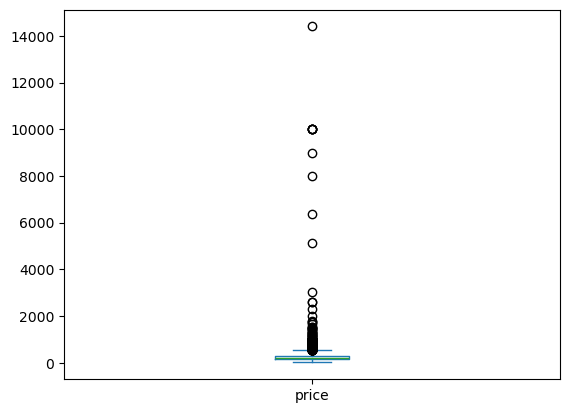

In [26]:
# Visualize the distribution of prices using a boxplot to identify potential outliers.
# This chart helps spot listings with extremely high prices that may affect the overall analysis.
df['price'].plot.box()


In [27]:
# Display descriptive statistics for the 'price' column to better understand the overall distribution.
# Includes key metrics like mean, median, standard deviation, min, and max.
df['price'].describe()


count     5911.000000
mean       265.115716
std        422.193489
min         10.000000
25%        145.000000
50%        209.000000
75%        300.000000
max      14404.000000
Name: price, dtype: float64

#  Task 6) Understanding the Data

### Outlier Analysis: `price`

To explore potential outliers, I plotted a boxplot of the `price` column.  
The chart shows that most listings fall within a typical price range, but there are several significant outliers.

Most prices are below €500, while some extreme values go beyond €10,000. These are likely rare or luxury listings and may skew the distribution.

At this stage, I decided to keep the outliers in the dataset, but I may consider filtering them in specific analyses later, depending on the context.

According to the descriptive statistics of the `price` column, 75% of listings cost less than €300, while the maximum price is €14,404.  
This confirms the presence of extreme outliers. The average price is €265, which is notably higher than the median (€209), indicating a right-skewed distribution.


## 6. List of all numeric variables

## Step 1: List of all numeric variables

In [32]:
# This shows all columns that contain numbers - e.g. price, minimum_nights, availability_365 etc
df.select_dtypes(include=['int64', 'float64']).columns.tolist()


['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'availability_eoy',
 'number_of_reviews_ly',
 'estimated_occupancy_l365d',
 'estimated_revenue_l365d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_pr

## Step 2: List of all categorical variables

In [34]:
# This shows all columns that contain objects - e.g. name, description etc
df.select_dtypes(include='object').columns.tolist()


['listing_url',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'has_availability',
 'license',
 'instant_bookable']

### Variables Overview

**Continuous Variables**
- `price`: Price per night
- `minimum_nights`: Minimum stay requirement per listing
- `reviews_per_month`: Average number of reviews received per month

**Categorical Variables**
- `room_type`: The type of accommodation (e.g., Private Room, Entire Home)
- `neighbourhood`: The area or district where the listing is located
- `host_is_superhost`: Whether the host is classified as a superhost


# Task 7) Consider limitations and ethics

### Limitations and Ethical Considerations

- **Data Age**: The dataset was last updated on 2 March 2025, making it highly relevant and up-to-date for current market insights.
- **Missing Data**: Several columns (e.g., `host_about`, `calendar_updated`) contain a significant number of missing values and were not included in the main analysis.
- **Bias**: The dataset only includes listings from Amsterdam. This restricts the findings to a specific geographic context and may not be generalizable to other cities or regions.
- **Source and Licensing**: The data is sourced from Inside Airbnb, a reputable open-data platform. It is publicly available and can be used for non-commercial, educational purposes.
- **Privacy**: No personally identifiable information is included. All host and listing data is appropriately anonymized to ensure user privacy.


In [38]:
# Export data to csv

df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'amsterdam_listings_cleaned.csv'))